# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="assets\\bricks.jpg" alt="logo">

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [4]:
color_data = pd.read_csv("data\\colors.csv")
color_data = color_data.dropna()
print(color_data.head())
print()
print(color_data.columns)


   id            name     rgb is_trans
0  -1         Unknown  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f

Index(['id', 'name', 'rgb', 'is_trans'], dtype='object')


In [ ]:
print(color_data["name"].unique()) # unique color names

['Unknown' 'Black' 'Blue' 'Green' 'Dark Turquoise' 'Red' 'Dark Pink'
 'Brown' 'Light Gray' 'Dark Gray' 'Light Blue' 'Bright Green'
 'Light Turquoise' 'Salmon' 'Pink' 'Yellow' 'White' 'Light Green'
 'Light Yellow' 'Tan' 'Light Violet' 'Glow In Dark Opaque' 'Purple'
 'Dark Blue-Violet' 'Orange' 'Magenta' 'Lime' 'Dark Tan' 'Bright Pink'
 'Medium Lavender' 'Lavender' 'Trans-Black IR Lens' 'Trans-Dark Blue'
 'Trans-Green' 'Trans-Bright Green' 'Trans-Red' 'Trans-Black'
 'Trans-Light Blue' 'Trans-Neon Green' 'Trans-Very Lt Blue'
 'Trans-Dark Pink' 'Trans-Yellow' 'Trans-Clear' 'Trans-Purple'
 'Trans-Neon Yellow' 'Trans-Neon Orange' 'Chrome Antique Brass'
 'Chrome Blue' 'Chrome Green' 'Chrome Pink' 'Chrome Black'
 'Very Light Orange' 'Light Purple' 'Reddish Brown' 'Light Bluish Gray'
 'Dark Bluish Gray' 'Medium Blue' 'Medium Green' 'Speckle Black-Copper'
 'Speckle DBGray-Silver' 'Light Pink' 'Light Flesh' 'Milky White'
 'Metallic Silver' 'Metallic Green' 'Metallic Gold' 'Medium Dark Flesh'
 'Da

In [9]:
print(color_data["name"].nunique()) # number of unique color names
print(color_data["name"].count()) # number of color names (suplicates included)
print(color_data["name"].value_counts()) # count of each color name

135
135
name
Unknown                1
Metal Blue             1
Bright Light Yellow    1
Rust                   1
Bright Light Blue      1
                      ..
Trans-Very Lt Blue     1
Trans-Neon Green       1
Trans-Light Blue       1
Trans-Black            1
[No Color]             1
Name: count, Length: 135, dtype: int64


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [11]:
print(color_data.groupby("is_trans").size()) # count

is_trans
f    107
t     28
dtype: int64


In [12]:
print(color_data.groupby("is_trans").value_counts()) # count of each color

is_trans  id     name                          rgb   
f         -1     Unknown                       0033B2    1
           0     Black                         05131D    1
           1     Blue                          0055BF    1
           2     Green                         237841    1
           3     Dark Turquoise                008F9B    1
                                                        ..
t          1002  Glitter Trans-Neon Green      C0F500    1
           1003  Glitter Trans-Light Blue      68BCC5    1
           1004  Trans Flame Yellowish Orange  FCB76D    1
           1005  Trans Fire Yellow             FBE890    1
           1006  Trans Light Royal Blue        B4D4F7    1
Name: count, Length: 135, dtype: int64


**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

<img src="assets\\lego_themes.png">

<h3> LEGO Theme : Batman </h3>

<img src="assets\\lego_sets.png" alt="logo set">


A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [16]:
set_data = pd.read_csv("data\\sets.csv")
set_data = set_data.dropna()
print(set_data.head())
print()
print(set_data.columns)

  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12

Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')


In [17]:
print(set_data.shape)
print(set_data.size)

(15710, 5)
78550


In [19]:
print(set_data.tail())

           set_num                                 name  year  theme_id  \
15705      wwgp1-1  Wild West Limited Edition Gift Pack  1996       476   
15706   XMASTREE-1                       Christmas Tree  2019       410   
15707      XWING-1                  Mini X-Wing Fighter  2019       158   
15708      XWING-2                    X-Wing Trench Run  2019       158   
15709  YODACHRON-1      Yoda Chronicles Promotional Set  2013       158   

       num_parts  
15705          0  
15706         26  
15707         60  
15708         52  
15709        413  


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [28]:
print(set_data.sort_values(by=['year']))

       set_num                               name  year  theme_id  num_parts
9521   700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9534   700.2-1               Large Gift Set (ABB)  1949       365        178
9539   700.3-1              Medium Gift Set (ABB)  1949       365        142
9544   700.A-1              Small Brick Set (ABB)  1949       371         24
9545   700.B-1  Small Doors and Windows Set (ABB)  1949       371         12
...        ...                                ...   ...       ...        ...
11289  75290-1                 Mos Eisley Cantina  2020       158          0
5147   41430-1              Summer Fun Water Park  2020       494       1012
11337  75550-1             Minions Kung Fu Battle  2021       689          0
11335  75547-1           Minion Pilot in Training  2021       689          0
11334  75546-1               Minions in Gru’s Lab  2021       689          0

[15710 rows x 5 columns]


In [24]:
print(f"In the year {set_data['year'].min()}, set '{set_data['name'][set_data['year'].idxmin()]}' was released !! ")

In the year 1949, set 'Extra-Large Gift Set (ABB)' was released !! 


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [35]:
print(set_data[set_data['year'] == 1949])

      set_num                               name  year  theme_id  num_parts
9521  700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9534  700.2-1               Large Gift Set (ABB)  1949       365        178
9539  700.3-1              Medium Gift Set (ABB)  1949       365        142
9544  700.A-1              Small Brick Set (ABB)  1949       371         24
9545  700.B-1  Small Doors and Windows Set (ABB)  1949       371         12


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [38]:
print(set_data.sort_values(by=['num_parts'], ascending = False).head())

        set_num                           name  year  theme_id  num_parts
15004  BIGBOX-1  The Ultimate Battle for Chima  2015       571       9987
11183   75192-1          UCS Millennium Falcon  2017       171       7541
10551   71043-1                Hogwarts Castle  2018       246       6020
295     10256-1                      Taj Mahal  2017       673       5923
221     10189-1                      Taj Mahal  2008       673       5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [50]:
cluster = set_data.groupby('year').count()

In [51]:
print(cluster['set_num'].head())

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

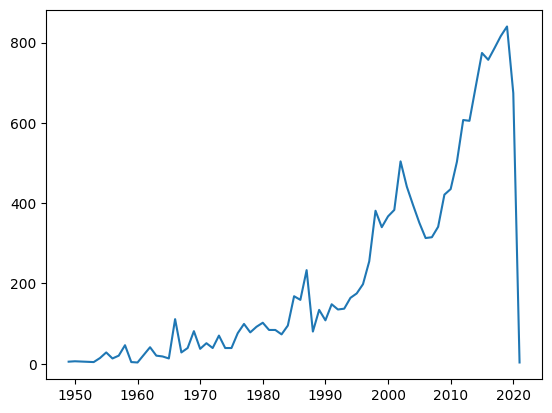

In [52]:
plt.plot(cluster['set_num'])

In [58]:
cluster = cluster.sort_values(by=['year'])
sliced_clutser = cluster[:len(cluster)-2]
print(sliced_clutser.tail())

      set_num  name  theme_id  num_parts
year                                    
2015      774   774       774        774
2016      757   757       757        757
2017      786   786       786        786
2018      816   816       816        816
2019      840   840       840        840


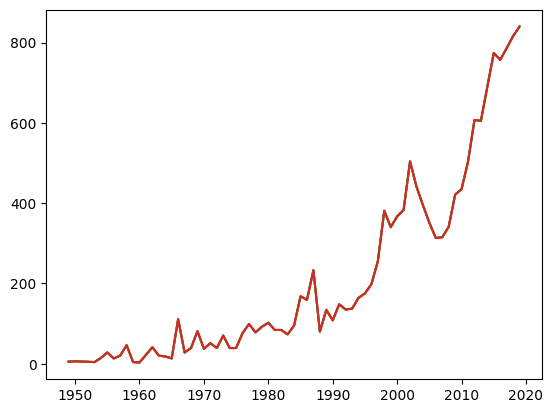

In [59]:
plt.plot(sliced_clutser)

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [65]:
theme_per_year = set_data.groupby('year').agg({"theme_id": "nunique"})
theme_per_year.rename(columns={"theme_id":"theme_num"}, inplace = True)
print(theme_per_year.head())
print()
print(theme_per_year.tail())

      theme_num
year           
1949          2
1950          1
1953          2
1954          2
1955          4

      theme_num
year           
2017         89
2018         93
2019         78
2020         82
2021          1


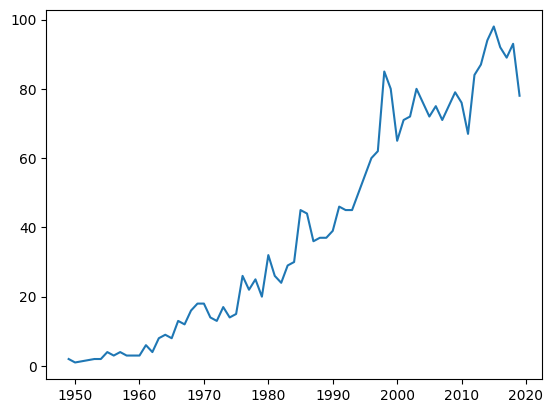

In [68]:
plt.plot(theme_per_year[:-2])

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

### Line Charts with Two Seperate Axes

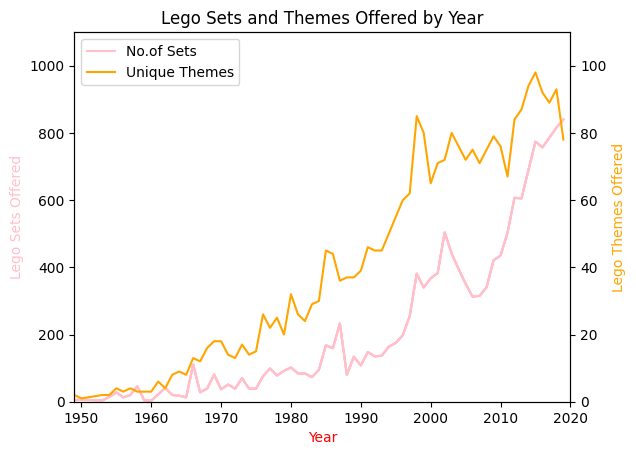

In [86]:
ax1 = plt.gca() #Get the current x-axis
l1 = ax1.plot(sliced_clutser, c = 'pink', label = "No.of Sets")
ax2 = ax1.twinx() #Have the same axis as x-axis
l2 = ax2.plot(theme_per_year[:-2], c = 'orange', label = 'Unique Themes')

ax1.set_xlim([1949, 2020])
ax2.set_ylim([0, 110])
ax1.set_ylim([0, 1100])

ax1.set_xlabel('Year', fontsize=10, color = 'red')
plt.title('Lego Sets and Themes Offered by Year', fontsize=12)

ax1.set_ylabel('Lego Sets Offered', fontsize=10, color='pink')
ax2.set_ylabel('Lego Themes Offered', fontsize=10, color='orange')

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
by_label = dict(zip(labels + labels2, handles + handles2))
plt.legend(by_label.values(), by_label.keys(), loc='upper left')


**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [91]:
average_no_of_parts = set_data.groupby('year').agg({'num_parts': pd.Series.mean})
print(average_no_of_parts)

       num_parts
year            
1949   99.600000
1950    1.000000
1953   13.500000
1954   12.357143
1955   36.607143
...          ...
2017  221.840967
2018  213.618873
2019  207.510714
2020  259.732938
2021    0.000000

[71 rows x 1 columns]


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

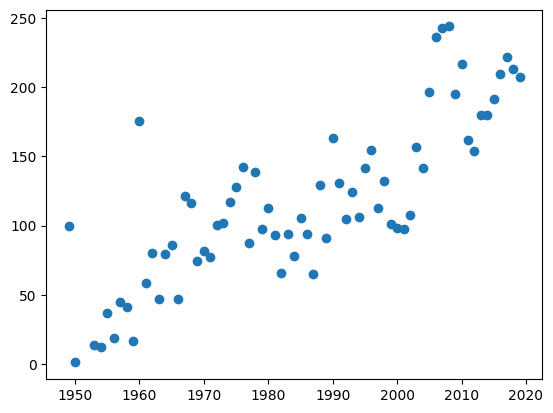

In [96]:
plt.scatter(x = average_no_of_parts.index[:-2], y = average_no_of_parts['num_parts'][:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [121]:
theme_data = pd.read_csv("data\\themes.csv")
# theme_data = theme_data.dropna()
print(theme_data.head())
print(theme_data.tail())
print()
print(theme_data.columns)
print()
print(theme_data.shape)

   id            name  parent_id
0   1         Technic        NaN
1   2  Arctic Technic        1.0
2   3     Competition        1.0
3   4  Expert Builder        1.0
4   5           Model        1.0
      id                   name  parent_id
591  705               Iron Man      696.0
592  706             Spider-Man      696.0
593  707                  X-Men      696.0
594  708  The LEGO Batman Movie      697.0
595  709               LEGO Art        NaN

Index(['id', 'name', 'parent_id'], dtype='object')

(596, 3)


**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="assets//rebrickable_schema.png" alt="plot">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [110]:
print(theme_data[theme_data['name'] == "Star Wars"])


      id       name  parent_id
17    18  Star Wars        1.0
174  209  Star Wars      207.0
211  261  Star Wars      258.0


In [111]:
print(set_data[set_data["theme_id"] == 18])

       set_num                                name  year  theme_id  num_parts
12051   8000-1                           Pit Droid  2000        18        223
12058   8001-1                        Battle Droid  2000        18        336
12066   8002-1                     Destroyer Droid  2000        18        567
12072   8008-1                        Stormtrooper  2001        18        360
12071   8007-1                               C-3PO  2001        18        339
12083   8012-1                  Super Battle Droid  2002        18        378
12081   8011-1                          Jango Fett  2002        18        425
8786   65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18          1
12074   8010-1                         Darth Vader  2002        18        388
12073   8009-1                               R2-D2  2002        18        239
15273  K8008-1      Darth Vader / Stormtrooper Kit  2002        18          0


In [112]:
print(set_data[set_data["theme_id"] == 209])

       set_num                            name  year  theme_id  num_parts
12019   7958-1  Star Wars Advent Calendar 2011  2011       209        267
14352   9509-1  Star Wars Advent Calendar 2012  2012       209        235
11013  75023-1  Star Wars Advent Calendar 2013  2013       209        254
11046  75056-1  Star Wars Advent Calendar 2014  2014       209        273
11080  75097-1  Star Wars Advent Calendar 2015  2015       209        291
11131  75146-1  Star Wars Advent Calendar 2016  2016       209        282
11173  75184-1  Star Wars Advent Calendar 2017  2017       209        309
11206  75213-1  Star Wars Advent Calendar 2018  2018       209        307
11245  75245-1  Star Wars Advent Calendar 2019  2019       209        280
11281  75279-1  Star Wars Advent Calendar 2020  2020       209        312


In [113]:
print(set_data[set_data["theme_id"] == 261])

      set_num                      name  year  theme_id  num_parts
14630  9748-1       Droid Developer Kit  1999       261        658
14636  9754-1  Dark Side Developers Kit  2000       261        578


### Merging (i.e., Combining) DataFrames based on a Key


In [114]:
set_theme_count = set_data["theme_id"].value_counts()
set_theme_count = pd.DataFrame({"id":set_theme_count.index,
                                "Theme Count" : set_theme_count.values})
print(set_theme_count.head())

    id  Theme Count
0  158          753
1  501          656
2  494          398
3  435          356
4  503          329


In [122]:
merged_data = pd.merge(set_theme_count, theme_data, on = "id")
print(merged_data)

      id  Theme Count           name  parent_id
0    158          753      Star Wars        NaN
1    501          656           Gear        NaN
2    494          398        Friends        NaN
3    435          356        Ninjago        NaN
4    503          329      Key Chain      501.0
..   ...          ...            ...        ...
566  212            1  Classic Basic      207.0
567  210            1       Belville      207.0
568  510            1           Boat      507.0
569  444            1    Adventurers      443.0
570  515            1      Dinosaurs      507.0

[571 rows x 4 columns]


<BarContainer object of 10 artists>

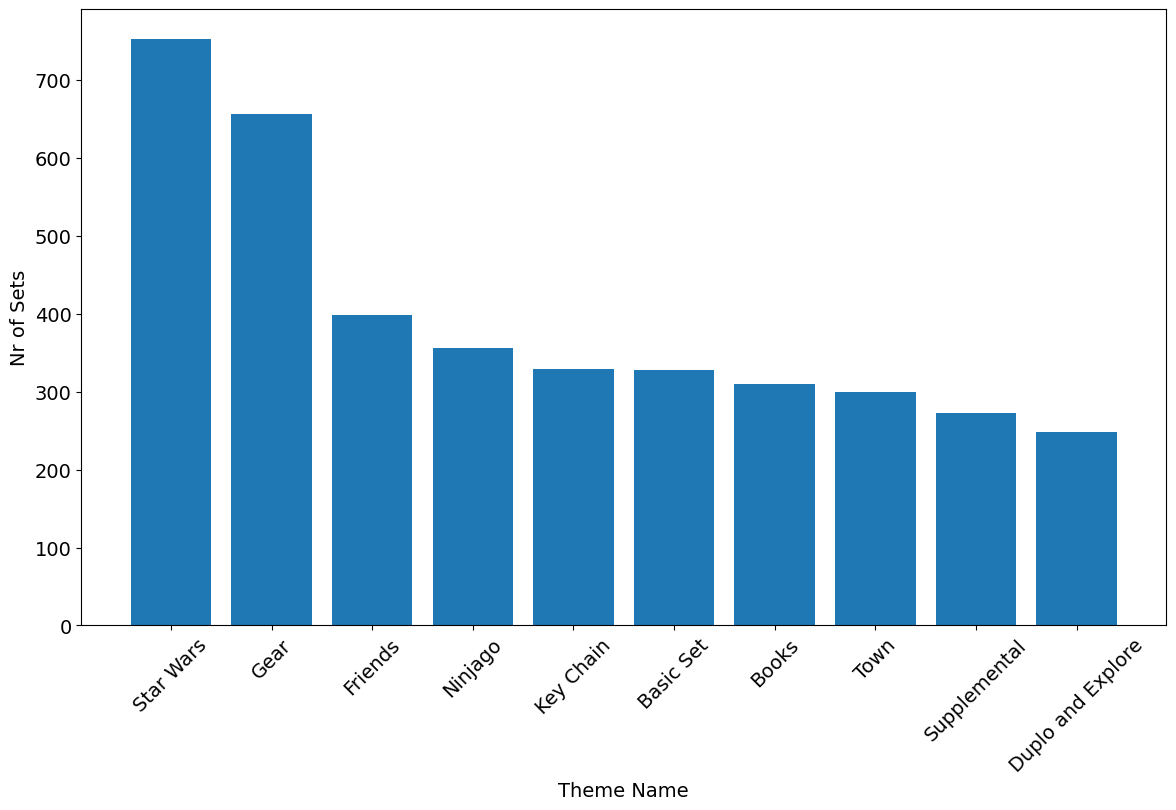

In [123]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
 
plt.bar(merged_data.name[:10], merged_data["Theme Count"][:10])